# Data Science with Python and Dask
## Chapter 2 - Introducing Dask

### Section 2.1.1: Examining the Metadata of Dask Objects

In [ ]:
# Change your working directory to where the data resides
import os
os.chdir('/Users/jesse/Documents')

In [6]:
# Listing 2.1
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df = dd.read_csv(r'C:\Users\User\juypter\files\nyc_data\nyc_flights.csv')
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
npartitions=1,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,int64,int64,int64,int64,int64,string,int64,string,string,string,int64,int64,int64,int64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
# Listing 2.2
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
air_time    int64
year          ...
Dask Name: sum, 4 expressions
Expr=(~ NotNull(frame=ReadCSV(aa5a36b))).sum()

In [8]:
# Listing 2.3
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
air_time    float64
year            ...
Dask Name: mul, 8 expressions
Expr=(~ NotNull(frame=ReadCSV(aa5a36b))).sum() / Index(frame=ReadCSV(aa5a36b)).size() * 100

### Section 2.1.2: Running Computations with the Compute Method

In [ ]:
# Listing 2.4
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct

In [35]:
import dask.dataframe as dd

# Corrected file path
file_path = r'C:\Users\User\juypter\files\nyc_data\nyc_flights.csv'

# Read the CSV file
ddframe = dd.read_csv(file_path, skiprows=[0, 1, 2, 3, 4, 5, 6], sep='|', assume_missing=True)
print(ddframe.compute())




       2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01T11:00:00Z
0       2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS...                                    
1       2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JF...                                    
2       2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LG...                                    
3       2013,1,1,558,600,-2,849,851,-2,B6,49,N793JB,JF...                                    
4       2013,1,1,558,600,-2,853,856,-3,B6,71,N657JB,JF...                                    
...                                                   ...                                    
336764  2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK...                                    
336765  2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA...                                    
336766  2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ...                                    
336767  2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ...   

In [36]:
import dask.array as da
from dask.diagnostics import ProgressBar

# Create a Dask array
a = da.random.default_rng().normal(size=(10000, 10000), chunks=(1000, 1000))
res = a.dot(a.T).mean(axis=0)

# Compute the result with a progress bar
with ProgressBar():
    out = res.compute()


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\array\routines.py:332: PerformanceWarning: Increasing number of chunks by factor of 10
  intermediate = blockwise(


[########################################] | 100% Completed | 194.89 s


In [14]:
# Listing 2.5
columns_to_drop = res[missing_count_pct > 60].index
with ProgressBar():
    df_dropped = df.drop(columns_to_drop, axis=1).persist()

NameError: name 'missing_count_pct' is not defined

### Section 2.2.1: Visualizing a Simple DAG using Dask Delayed Objects

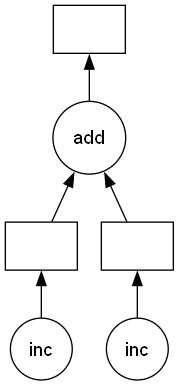

In [20]:
# Listing 2.6
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Section 2.2.2: Visualizing More Complex DAGs with Loops and Collections

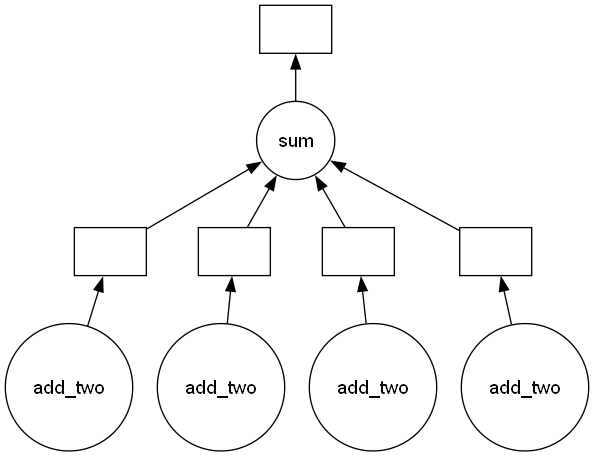

In [21]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

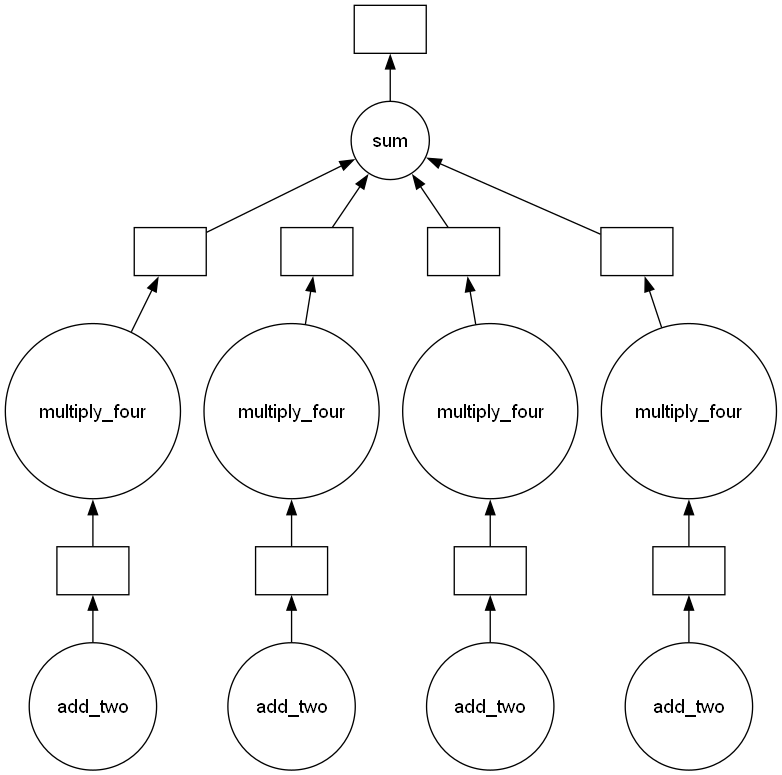

In [22]:
# Listing 2.8
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

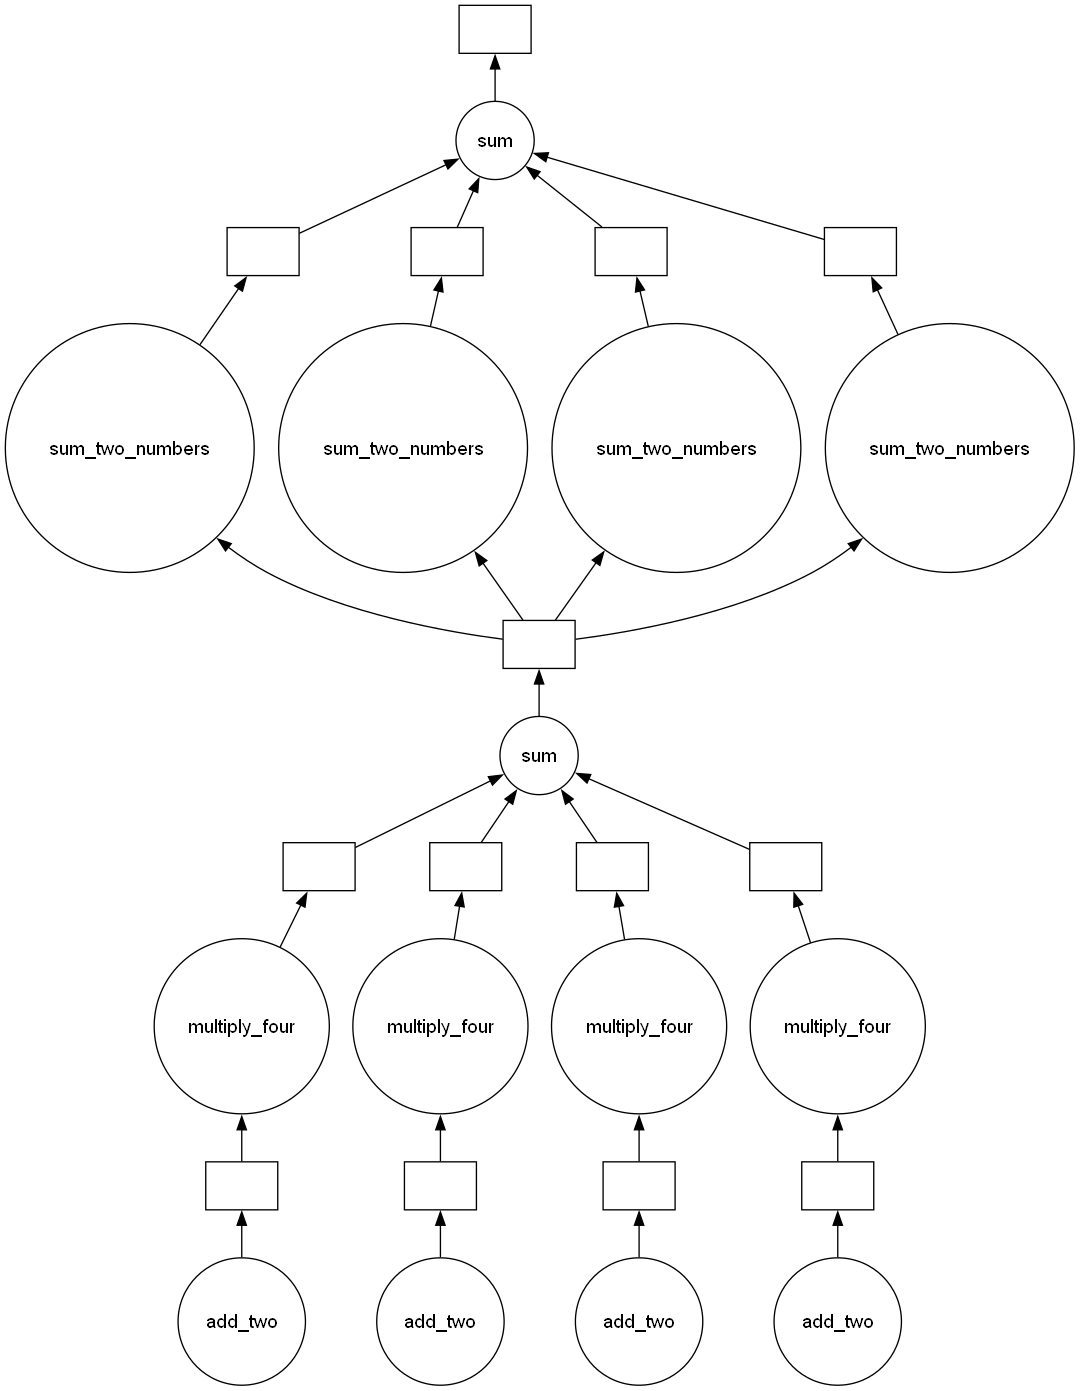

In [23]:
# Listing 2.9
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

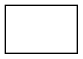

In [24]:
# Listing 2.10
total_persisted = total.persist()
total_persisted.visualize()

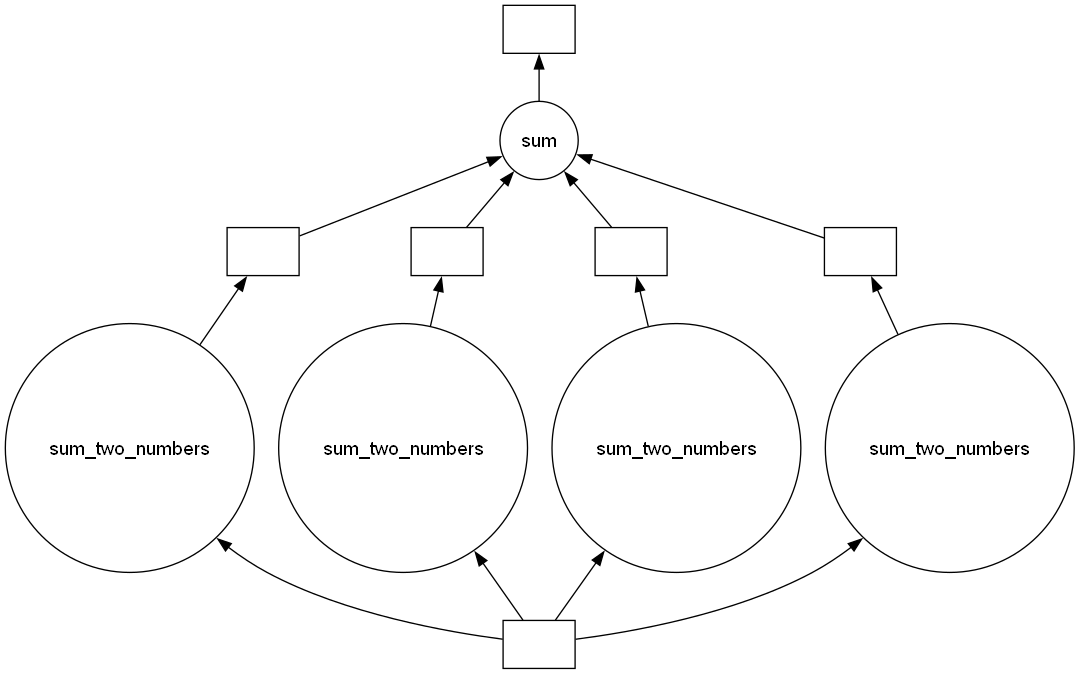

In [25]:
# Listing 2.11
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

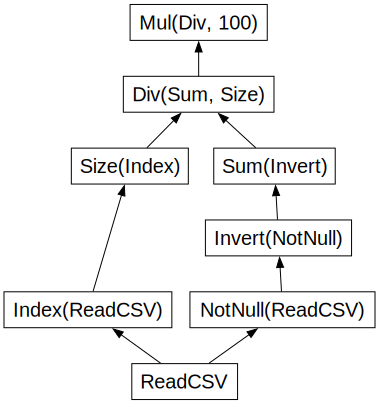

In [26]:
# Listing 2.12
missing_count.visualize()